### Imports

In [102]:
import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

#### CSV 파일 raw 변수에 저장.

In [103]:
# Load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# Check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


### raw 변수의 데이터 정보를 확인하고, 공분산을 확인한다.
#### 아래의 경우 변수간의 correlation을 확인해본 결과 두 독립변수(Corruption과 Legal) 사이에 다중공전성이 발생하였다.
#### 이에 Corruption을 배제하고 분석을 진행한다.

In [104]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


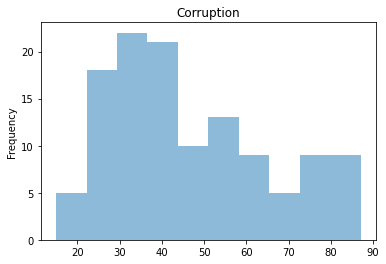

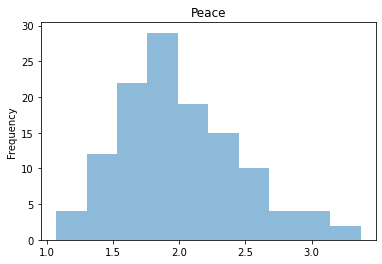

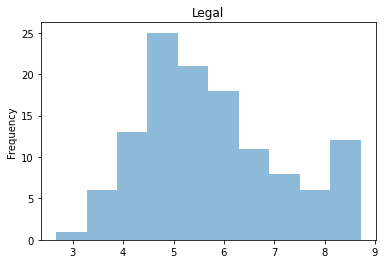

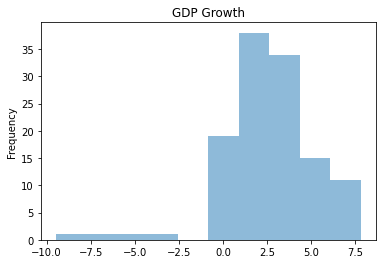

In [105]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

### 정규화

In [106]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()

## K-Means

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


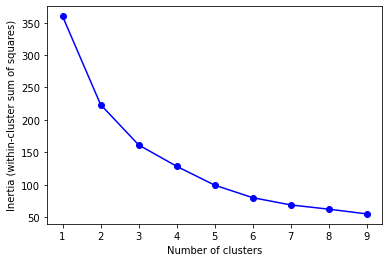

In [7]:
# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

In [8]:
k = 3 # 위 WSS-vs-k에서 최적의 K를 3으로 추정.
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ")
print(kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.13338710052557
cluster centers: 
[[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


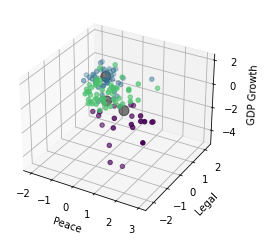

In [9]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

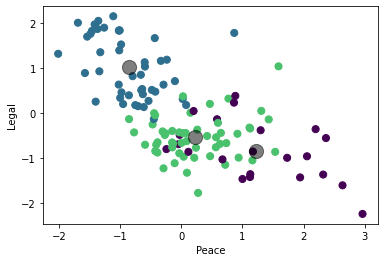

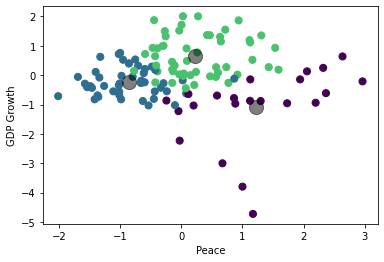

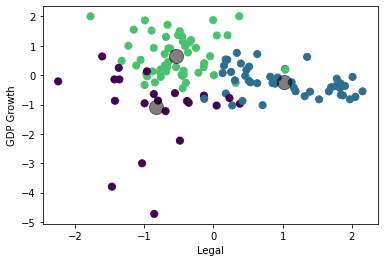

In [10]:
figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### 계층적 결합 군집(HAC)

In [96]:
from sklearn.cluster import AgglomerativeClustering # HAC clustering
import scipy.cluster.hierarchy as sch # HAC Denddrogram
from scipy.cluster.hierarchy import dendrogram

In [97]:
def HAC(method, K): # method에는 군집 간의 거리를 측정하기 위한 거리 측정 방법이 들어감.
    hac_x = X[['Peace', 'Legal','GDP Growth']] # 3개의 변수                                     
    plt.figure(figsize = (16,9), dpi = 300)

    hac_z = sch.linkage(hac_x, method = method, optimal_ordering = True) # Sch 함수를 통해 덴드로그램 생성.

    sch.set_link_color_palette(['red', '#34eb34', 'blue', '#ae34eb'])     # 색은 4개가 반복되도록 함.
    sch.dendrogram(hac_z, leaf_rotation=90, leaf_font_size=6, labels=list(raw['Abbrev']), 
                   color_threshold= K, above_threshold_color='black')

    # Add horizontal line
    plt.axhline(y=K, c='grey', lw=1, linestyle='dashed') # 시각적으로 K의 위치를 파악하기 위해 회색선으로 K 위치 표시.

    # Show the plot
    plt.show()

### Method를 Average(평균 연결법)으로 수행한 경우

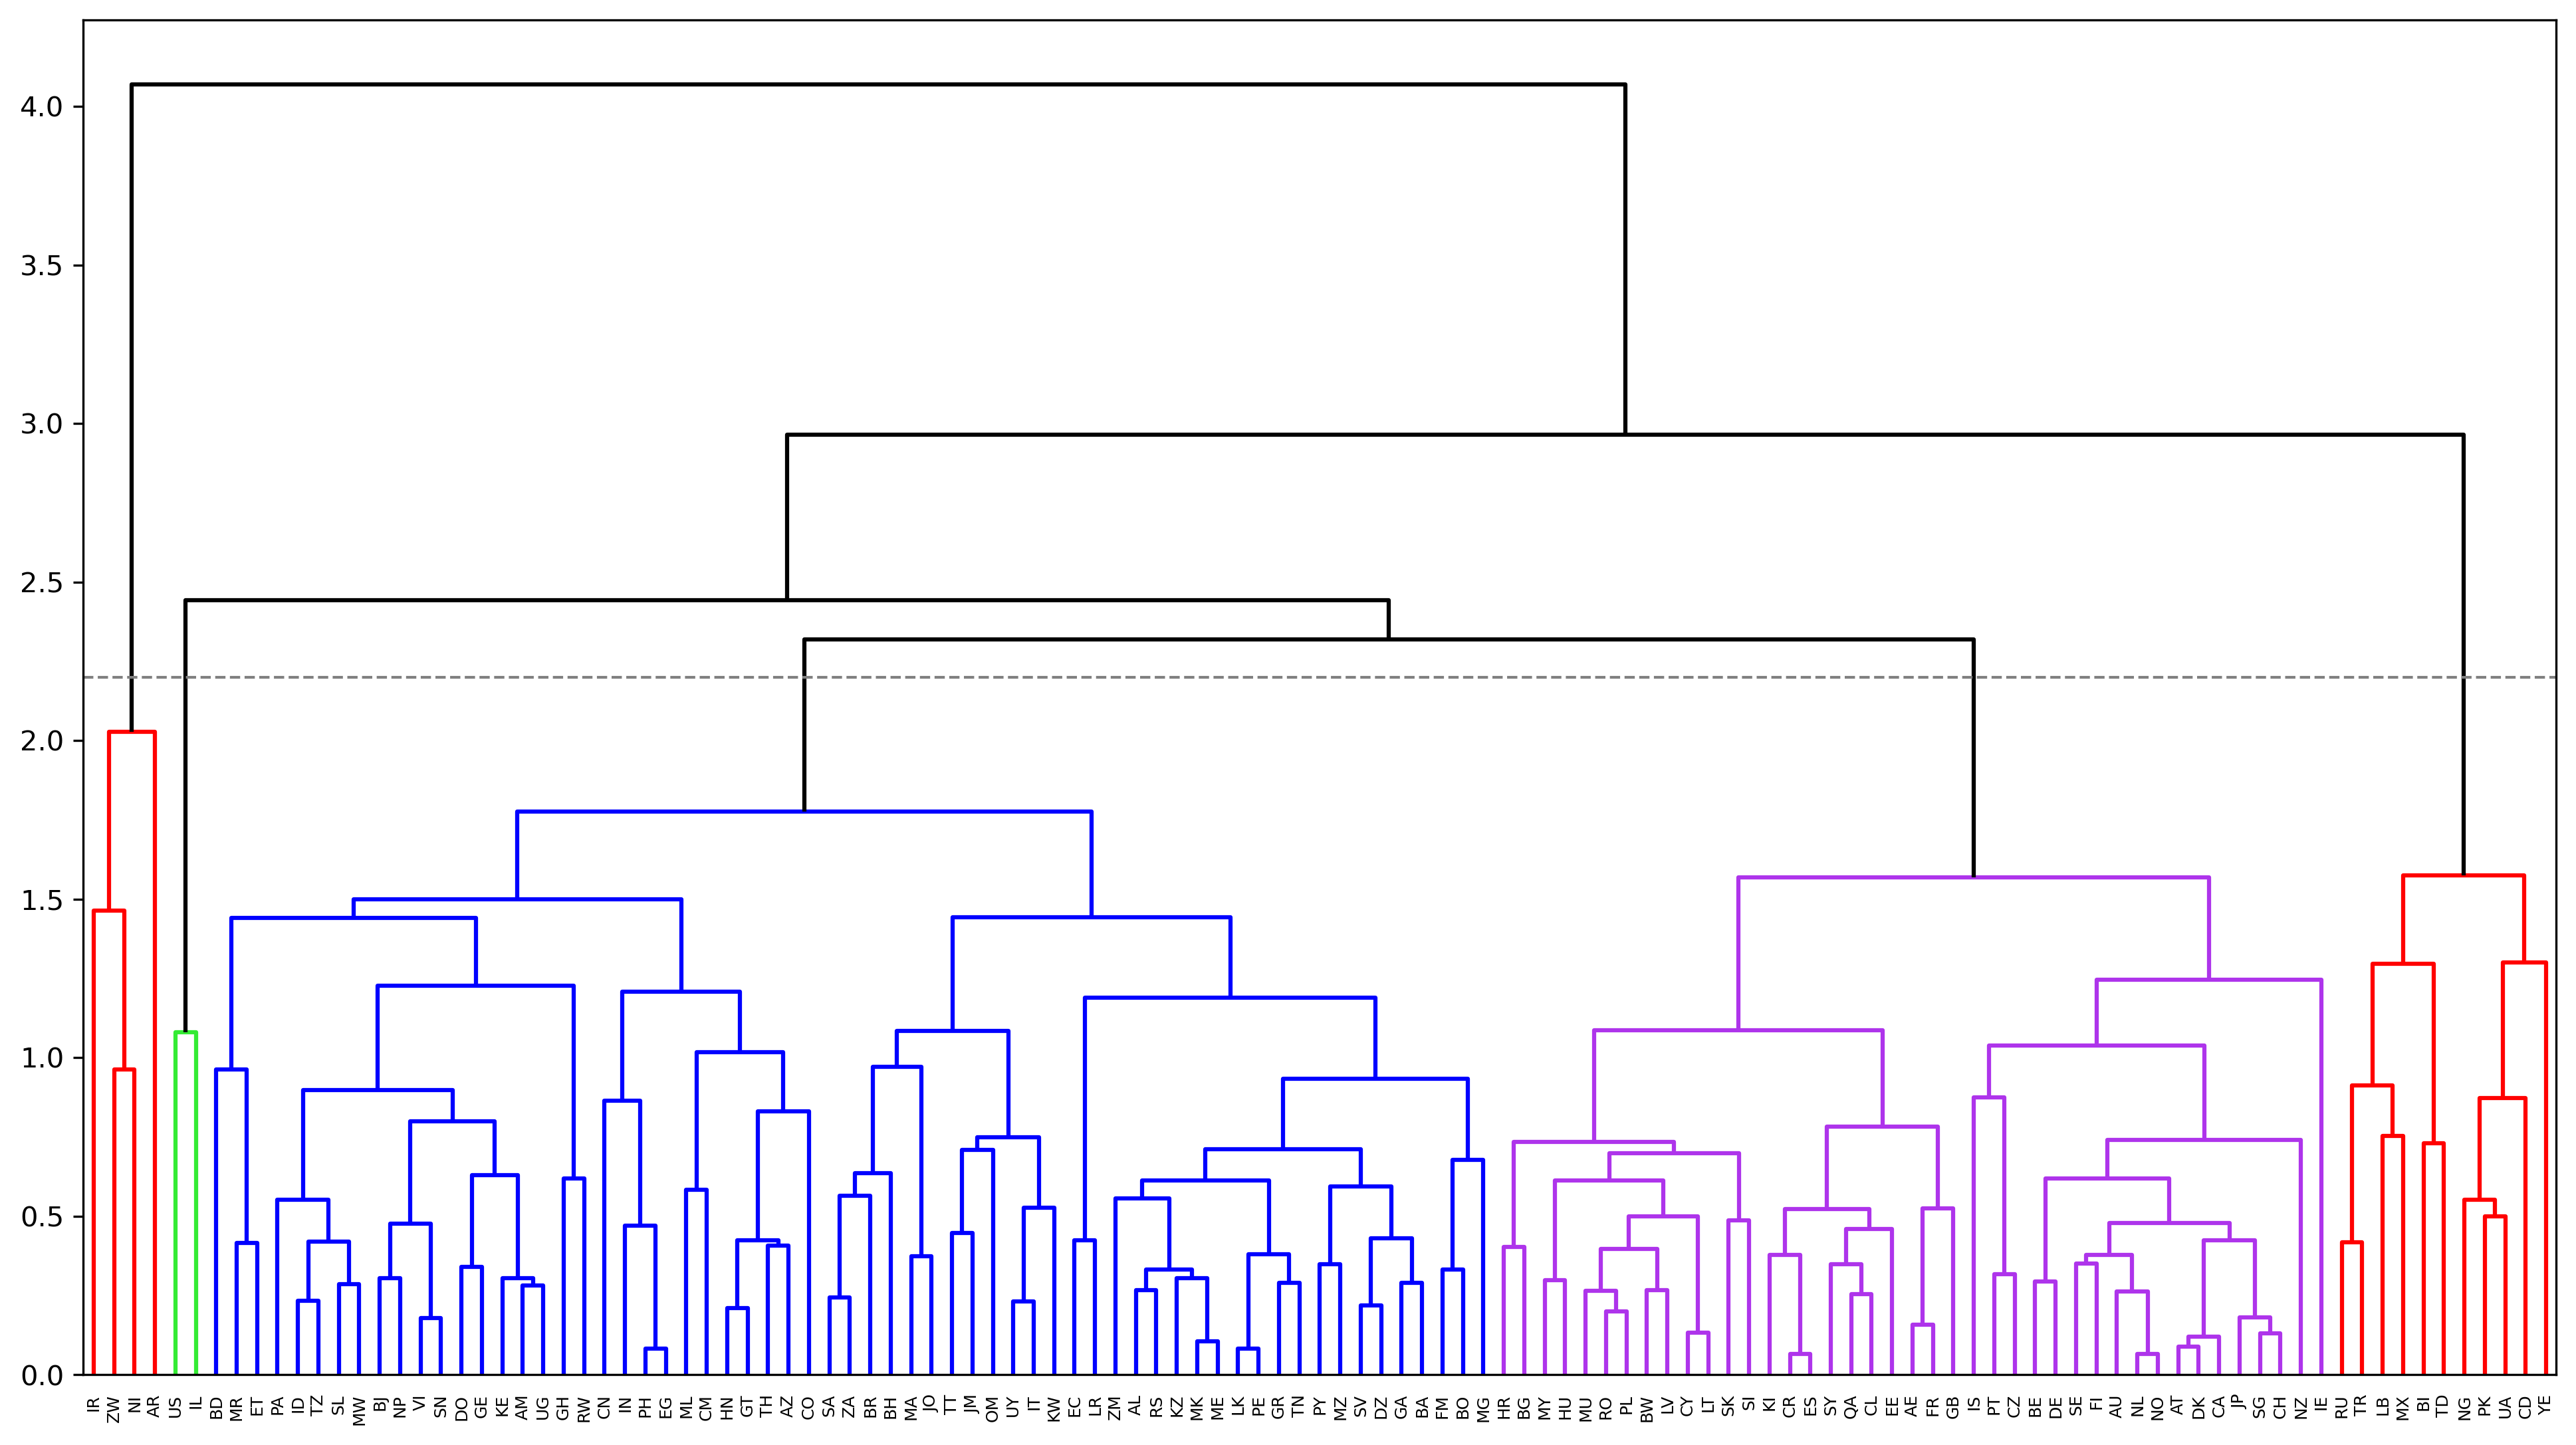

In [20]:
HAC('average', 2.2) # 위 함수에 method를 평균 연결법으로 수행, K일 것 같은 값 임의로 설정

### 단일연결법(Single Linkage)
#### ==>최단연결법. 생성된 군집과 기존의 데이터들의 거리를 가장 가까운 데이터로 계산.

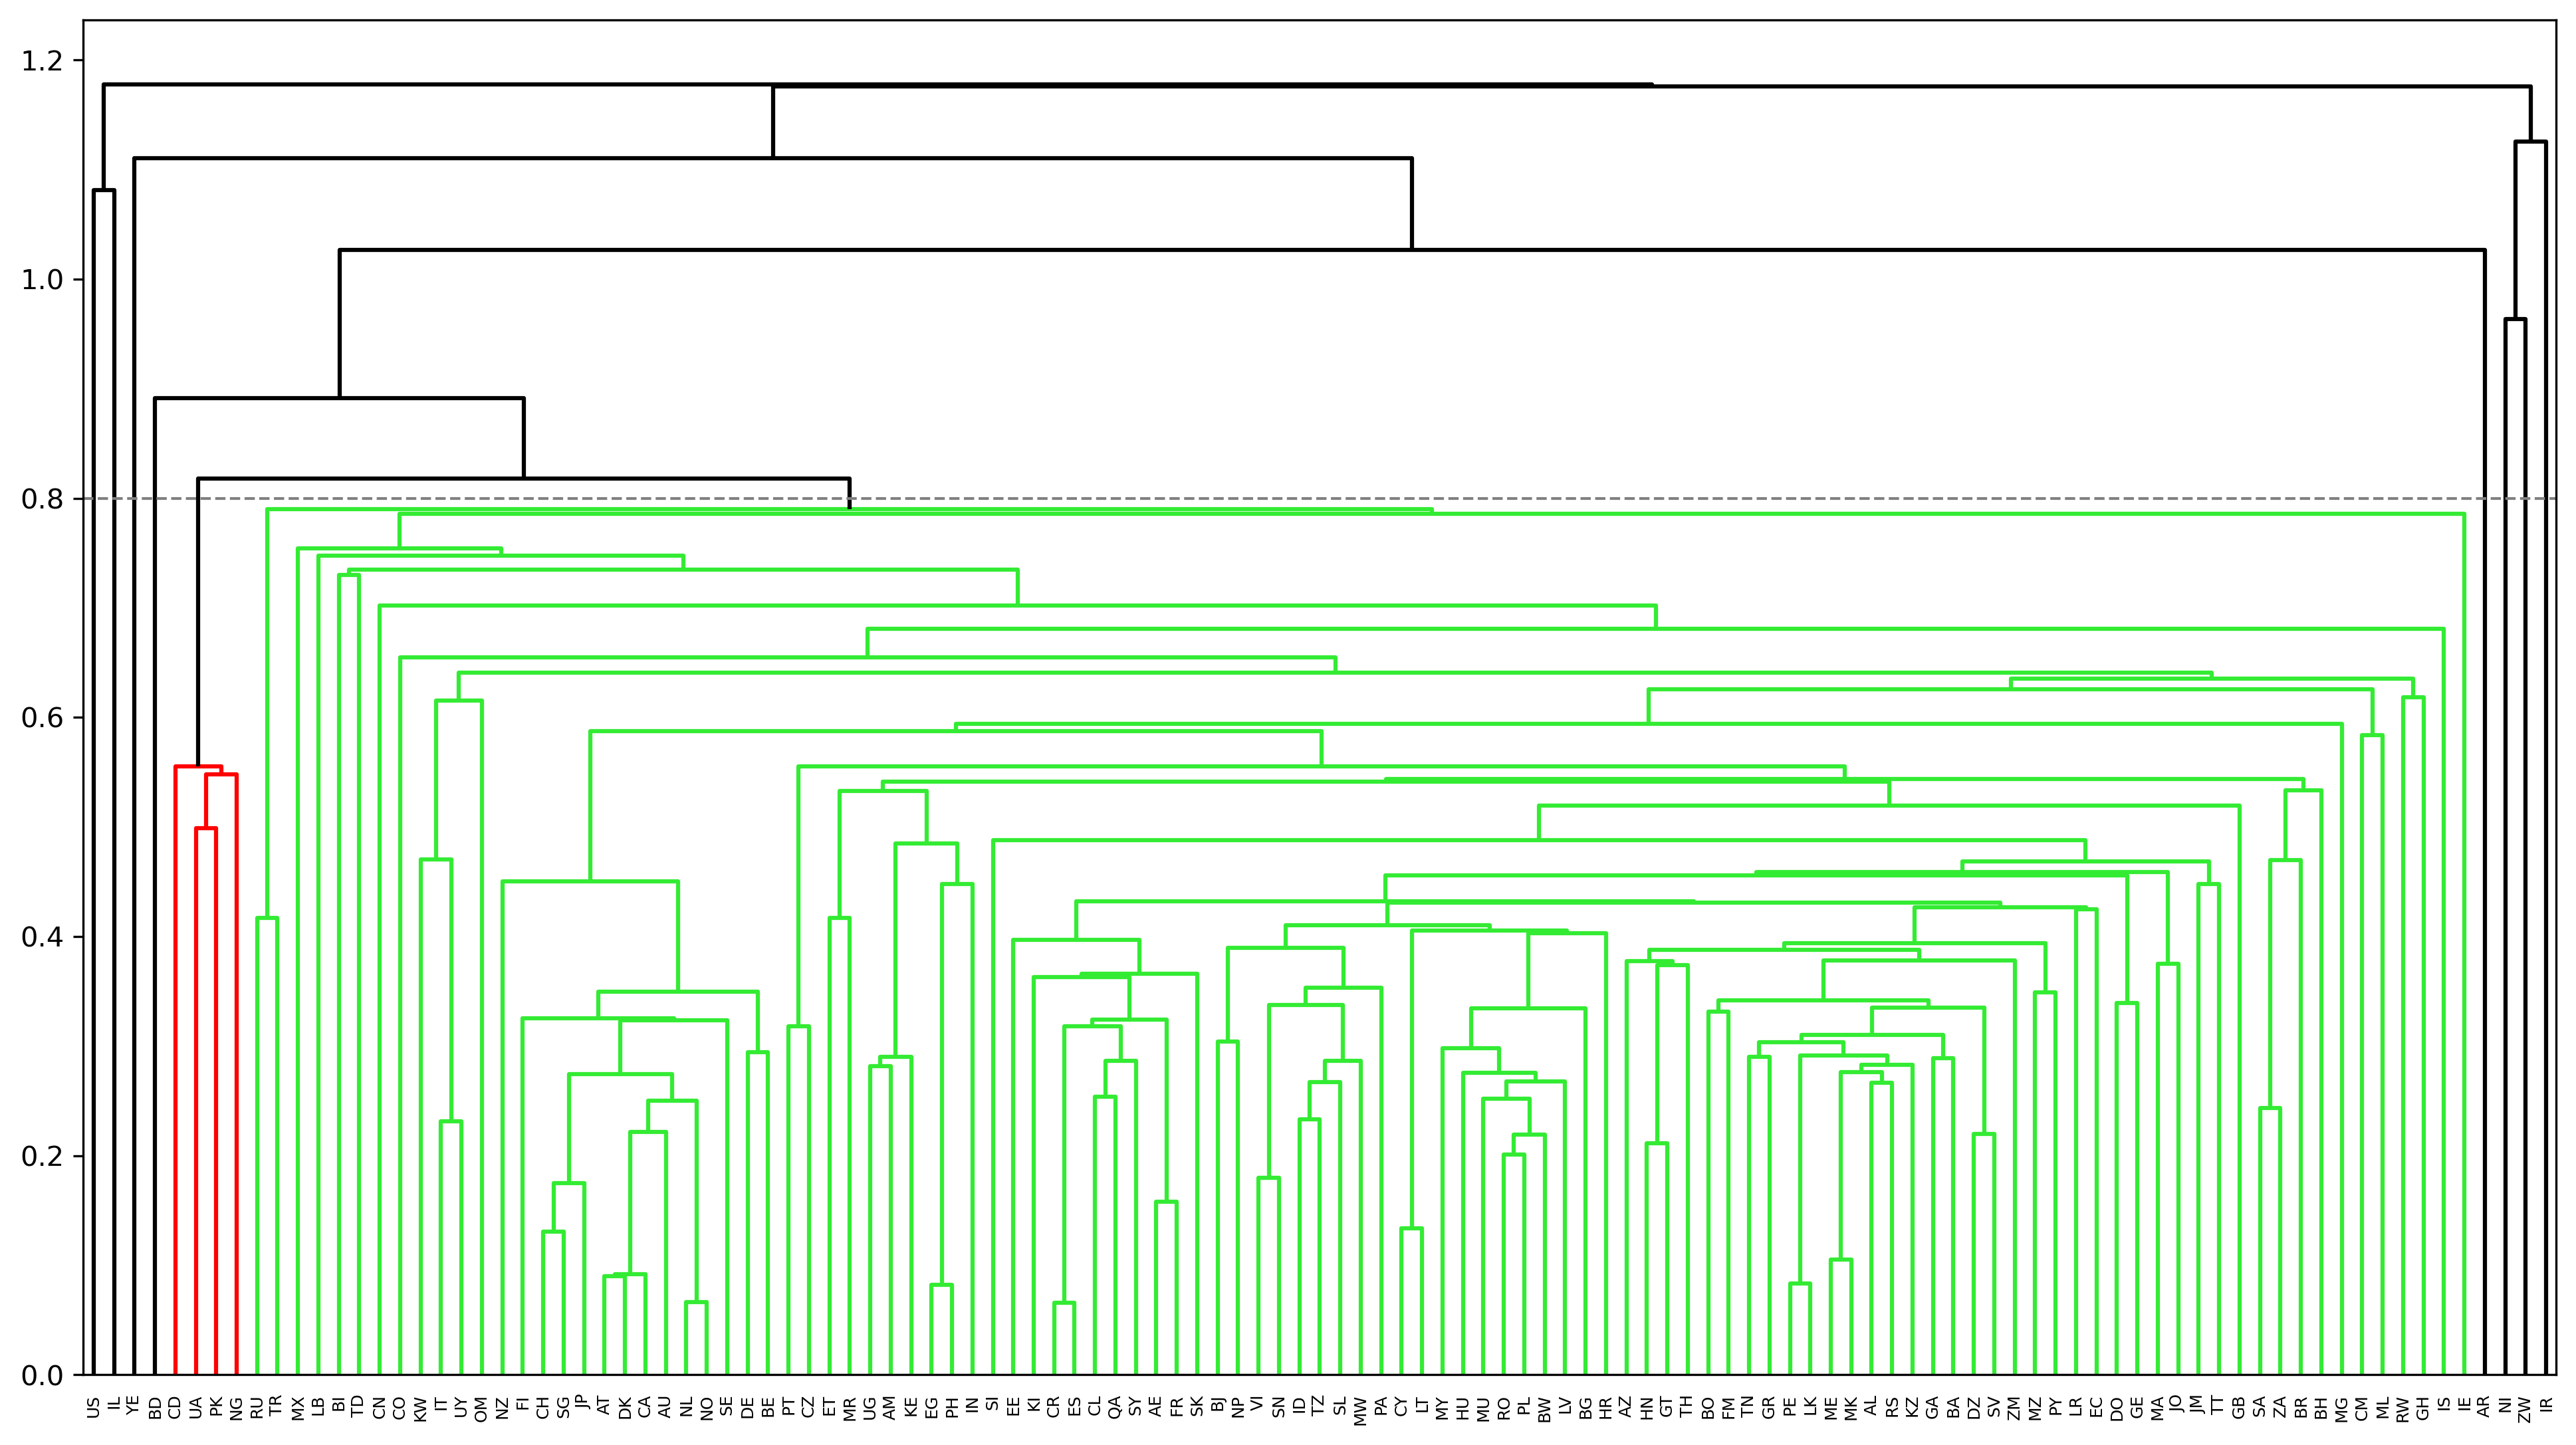

In [21]:
HAC('single', 0.8) # 사실상 제대로 군집을 만들지 못한다고 판단됨.

### 완전연결법(Complete Linkage)
#### ==> 최장연결법. 데이터들의 거리를 가장 먼 데이터로 계산. 내부 응집성에 중점을 둔 방법.

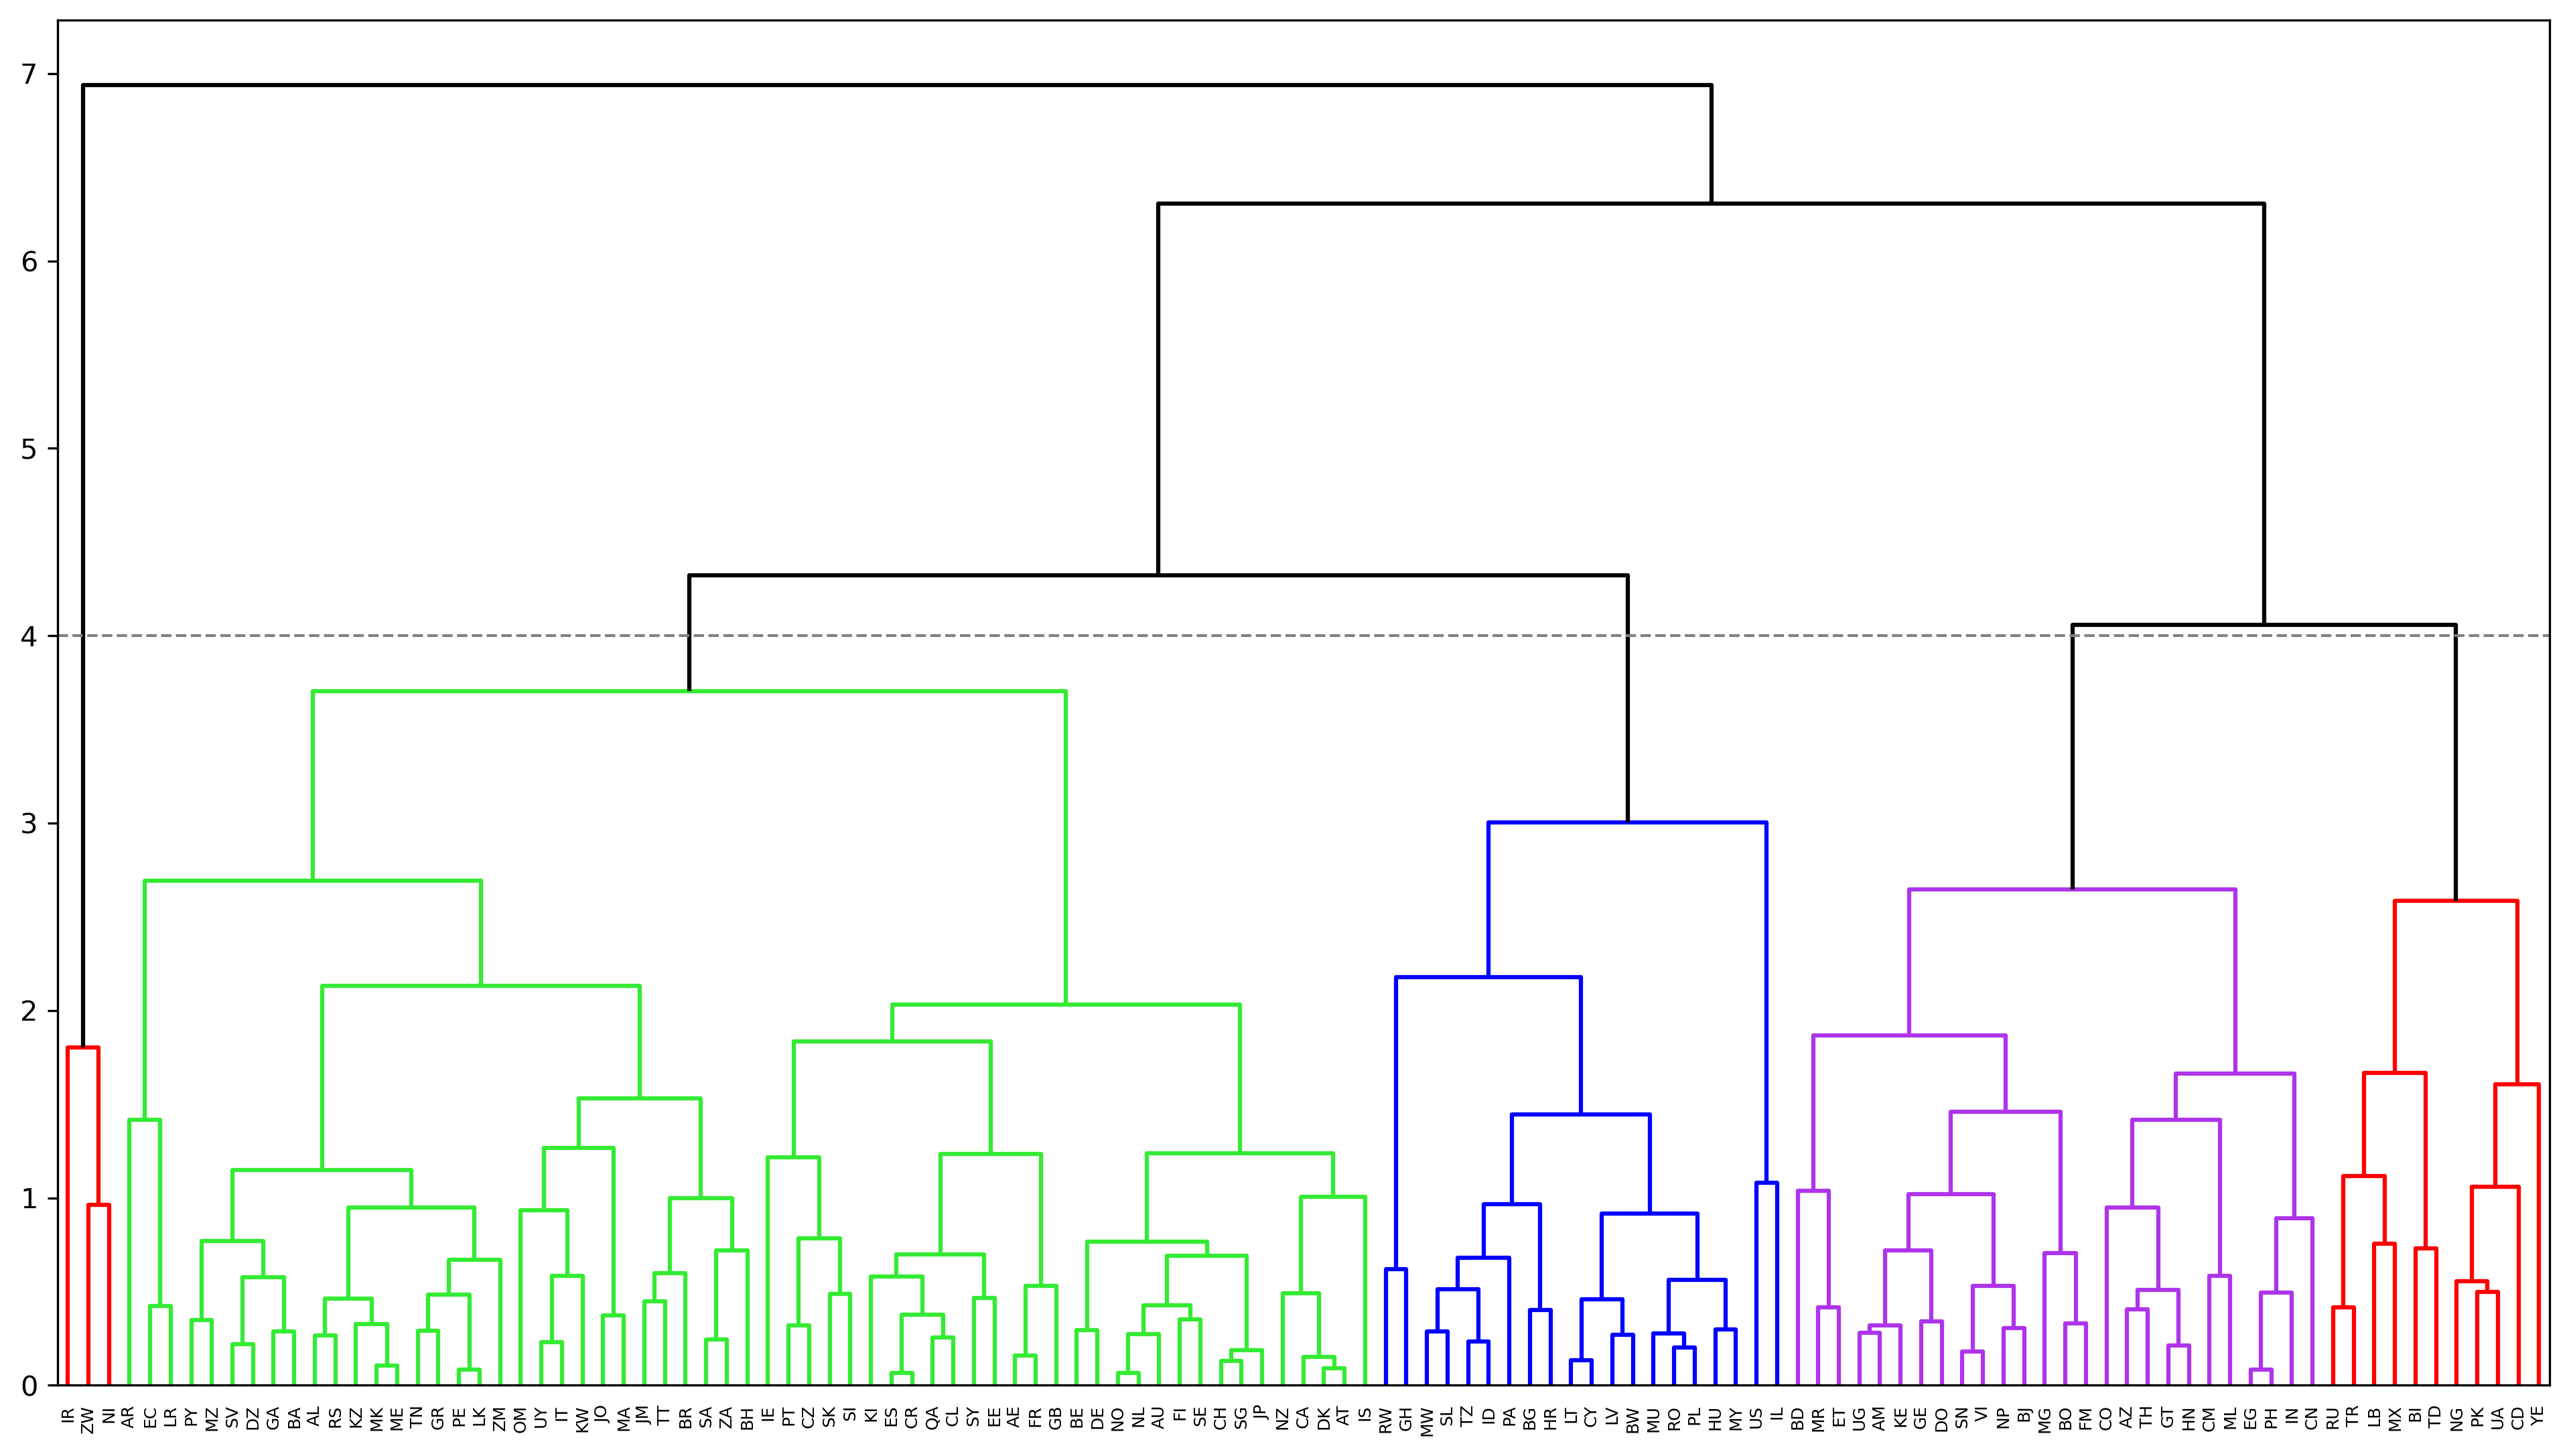

In [22]:
HAC('complete', 4)

### 중심연결법(Centroid Linkage)
#### ==> 각 군집의 중심점 사이의 거리를 거리로 정의한 방법.

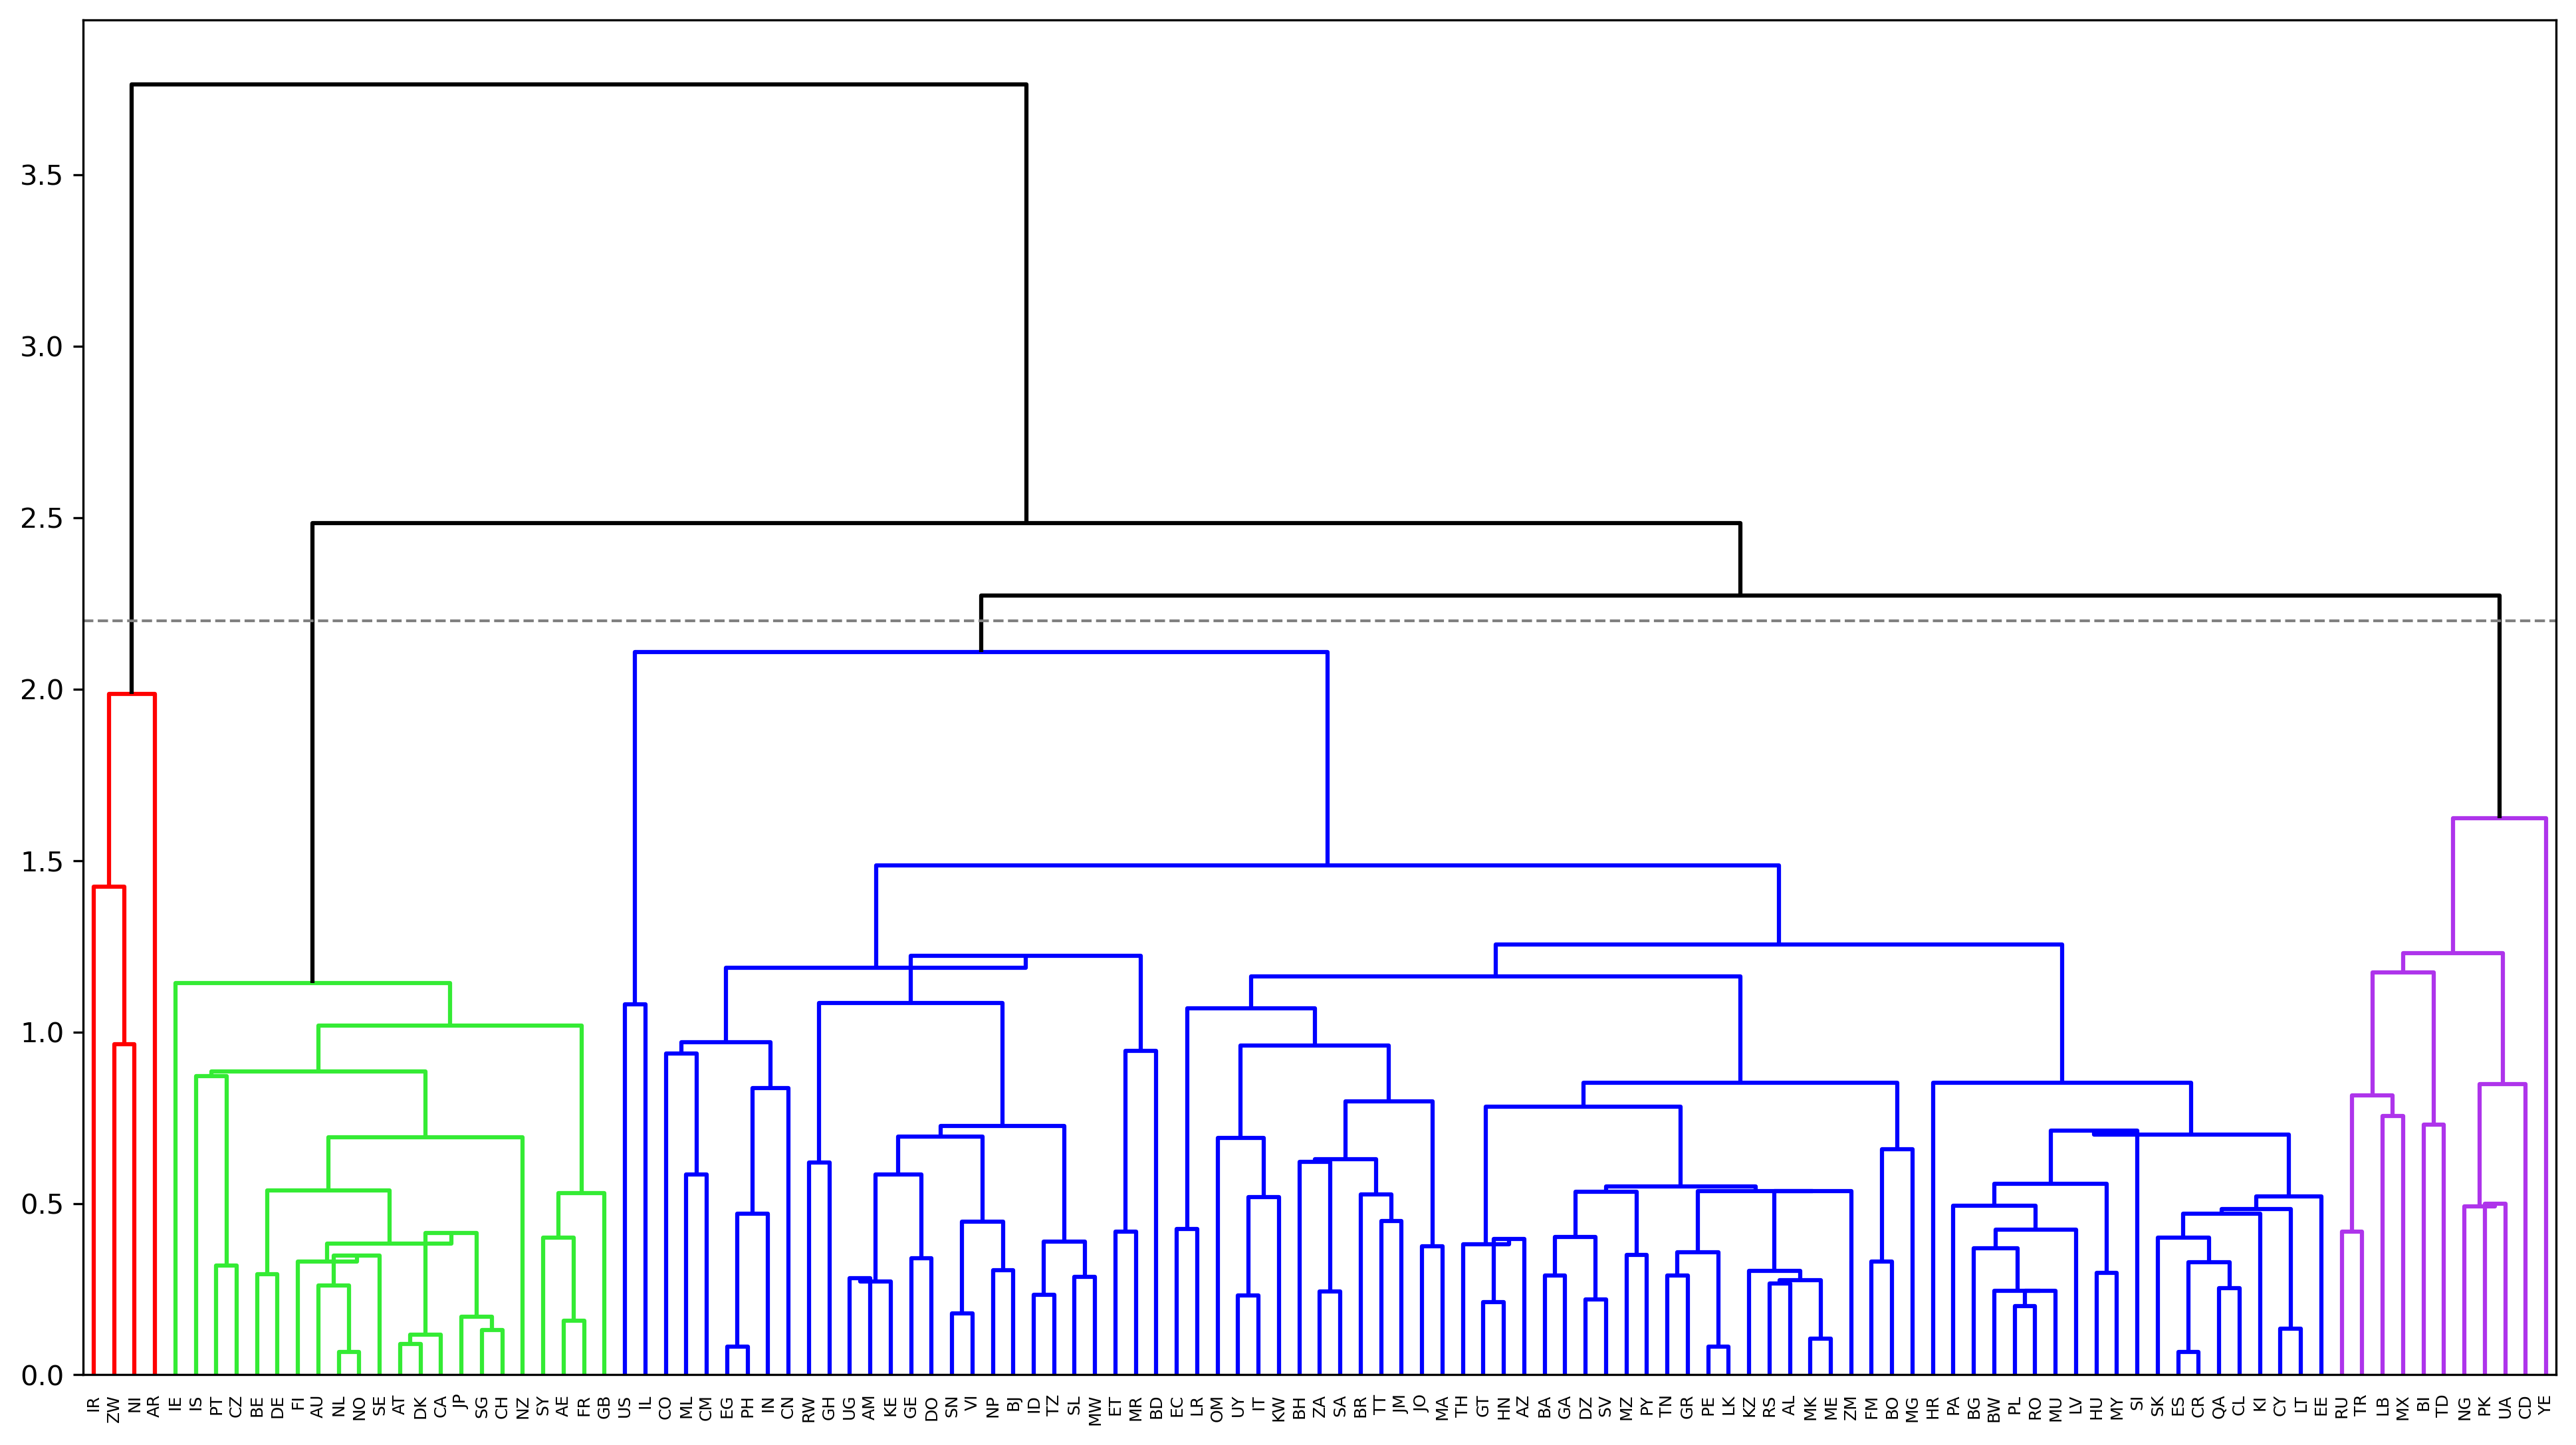

In [23]:
HAC('centroid',2.2)

### 와드연결법(Ward Linkage)

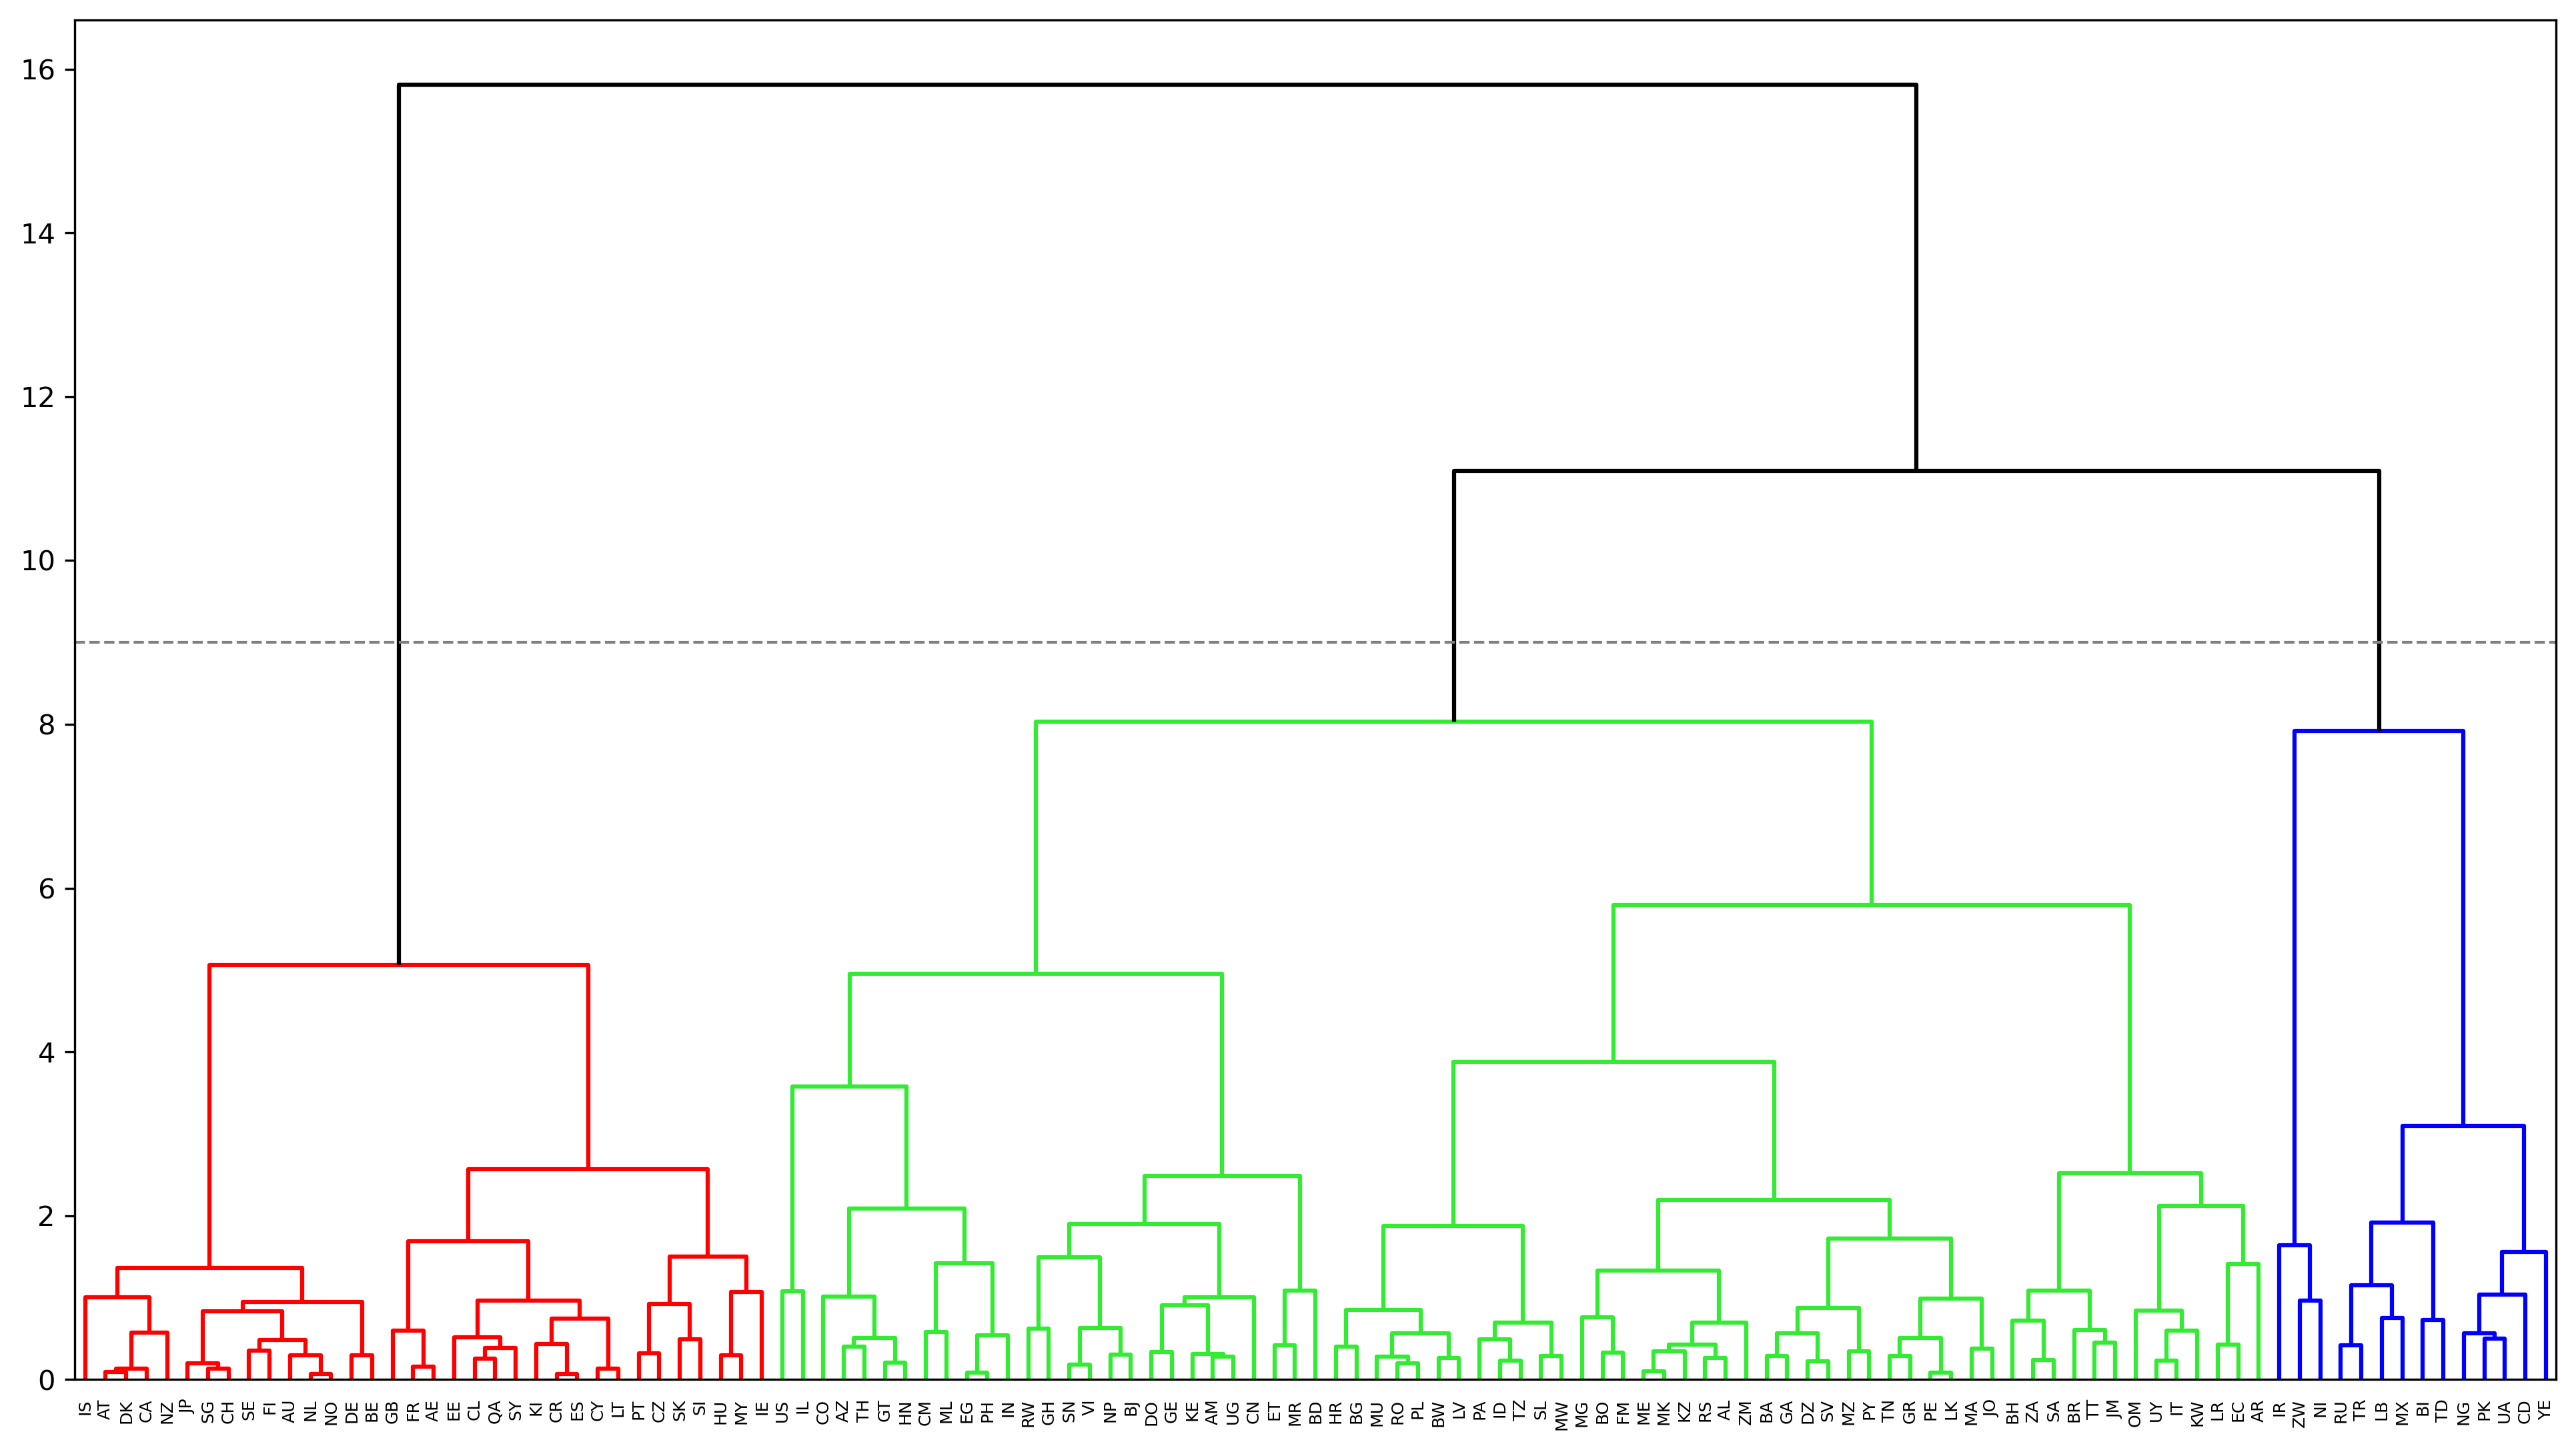

In [24]:
HAC('ward',9)

## DBSCAN
    개념 : 높은 밀도로 모여 있는 Observation들을 중심으로 군집을 형성
    ▶ 모수(Parameter)
        ● ϵ : 데이터로부터의 반경(= ϵ - neighberhood of x)
        ● minPts : 군집을 구성하는데 필요한 최소의 데이터 수
    ▶ 분류 점(Point)
        ● core point : 한 점의 ϵ-반경 내에 minPts 보다 많은 개체가 포함된 점.
        ● border point : 적어도 하나의 코어점의 반경에 속하는 점.
        ● noise point : core point가 아닌 점으로, ϵ-반경 내에 minPts보다 적은 수의 개체를 포함하는 점.

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import metrics

In [107]:
print(X)

        Peace     Legal  GDP Growth
0   -0.390081 -0.878158    0.126952
1    0.472352 -0.958948   -0.040772
2   -0.026039 -0.484397   -2.230541
3    0.634871 -0.684553    1.303747
4   -1.261182  1.900001   -0.368418
..        ...       ...         ...
116 -0.628442  0.419578   -0.880560
117 -0.268734 -0.486581    1.498775
118  2.964307 -2.242855   -0.212396
119 -0.424752 -0.844677   -0.248281
120  1.001080 -1.466251   -3.797001

[121 rows x 3 columns]


In [108]:
X = StandardScaler().fit_transform(X)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

In [109]:
print(X)

[[ 0.53454732 -0.76288855 -1.23913701]
 [ 0.01726873 -0.92295805  0.72140938]
 [-0.56122737  1.57560454 -0.36021861]
 ...
 [-0.04158599  1.2236547  -0.09527965]
 [-0.11527598 -0.95469697  0.71173083]
 [ 0.29993829 -1.20157614  1.08143469]]


Estimated number of clusters: 3
Estimated number of noise points: 104
Homogeneity: 0.854
Completeness: 0.696
V-measure: 0.767
Adjusted Rand Index: 0.777
Adjusted Mutual Information: 0.766
Silhouette Coefficient: 0.469


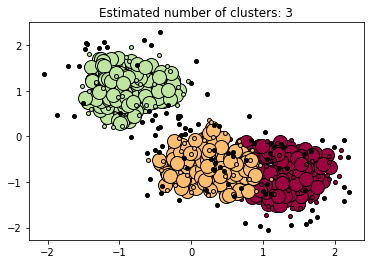

In [88]:
# #############################################################################
# Compute DBSCAN

db = DBSCAN(eps=0.3, min_samples=6).fit(X) # ϵ = 0.3, minpts = 6
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # Noise를 검은색으로 표시.

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",        # 그래프 마커 모서리 색을 검은색으로 설정.
        markersize=14,              # 그래프 마커 크기 14로 설정
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=4,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [95]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
print(colors)

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0), (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0), (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]
